# 📓 Lagrangian Mechanics Tutorial
## 🔹 Example 5: Cart-Pole System with Damping and External Force

In [1]:
from sympy import symbols, Function, diff, simplify, solve, Eq, dsolve, sin, cos
from sympy.physics.mechanics import dynamicsymbols
from sympy import init_printing
from IPython.display import display

init_printing()  # Enables pretty LaTeX-style printing in Jupyter


## 🔹 1. Define Coordinates and Time
We model a cart-pole system where:
- The cart moves along the x-axis with position $x(t)$
- The pendulum swings with angle $\theta(t)$ from vertical
- There is damping in both $x$ and $\theta$
- An external force $F$ is applied to the cart


<img src="https://jsteinhardt.stat.berkeley.edu/images/Cart-pendulum.png" />


In [2]:
t = symbols('t')
x = dynamicsymbols('x')             # cart position
theta = dynamicsymbols('theta')     # pendulum angle from vertical
m, M, l, g, F, cx, ctheta = symbols('m M l g F c_x c_theta')  # masses, length, gravity, force, damping

## 🔹 2. Kinetic Energy \( T \)

The total kinetic energy consists of:

- **Cart**: translational motion along the \( x \)-axis:
  $$
  T_{\text{cart}} = \frac{1}{2} M \dot{x}^2
  $$

- **Pendulum**: treated as a rigid rod, has both:
  - **Translational energy** of the center of mass (CoM):
    $$
    T_{\text{pend,trans}} = \frac{1}{2} m \left( \dot{x}_{\text{cm}}^2 + \dot{y}_{\text{cm}}^2 \right)
    $$
    where:
    $$
    x_{\text{cm}} = x + \frac{l}{2} \sin\theta, \quad
    y_{\text{cm}} = -\frac{l}{2} \cos\theta
    $$

  - **Rotational energy** about its pivot point:
    $$
    T_{\text{pend,rot}} = \frac{1}{2} I \dot{\theta}^2, \quad
    I = \frac{1}{3} m l^2
    $$

- **Total kinetic energy**:
  $$
  T = T_{\text{cart}} + T_{\text{pend,trans}} + T_{\text{pend,rot}}
  $$


In [5]:
x_dot = diff(x, t)
theta_dot = diff(theta, t)

# Position of pendulum's center of mass
x_cm = x + (l/2) * sin(theta)
y_cm = -(l/2) * cos(theta)

vx_cm = diff(x_cm, t)
vy_cm = diff(y_cm, t)

# Moment of inertia of a rod about pivot
I = (1/3) * m * l**2

# Total kinetic energy
T = (1/2) * M * x_dot**2 + (1/2) * m * (vx_cm**2 + vy_cm**2) + (1/2) * I * theta_dot**2
T = simplify(T)
display(T)

## 🔹 3. Potential Energy $V$

Pendulum contributes gravitational potential energy.

In [6]:
V = -m * g * (l/2) * cos(theta)
display(V)

## 🔹 4. Lagrangian $L = T - V$

In [7]:
L = T - V
display(L)

## 🔹 5. Euler-Lagrange Equations with Damping and External Force

To account for **non-conservative forces** like damping and external force, we include them as **generalized forces** on the right-hand side of the Euler–Lagrange equations:

$$
\frac{d}{dt} \left( \frac{\partial L}{\partial \dot{q}_i} \right) - \frac{\partial L}{\partial q_i} = Q_i
$$

For the cart-pole system:

- For the **cart** (coordinate $x$), we include:
  - An external force $F$
  - Linear damping proportional to $\dot{x}$ with coefficient $c_x$

  So the generalized force is:

  $$
  Q_x = F - c_x \dot{x}
  $$

- For the **pendulum** (coordinate $\theta$), we include:
  - Rotational damping proportional to $\dot{\theta}$ with coefficient $c_\theta$

  So the generalized force is:

  $$
  Q_\theta = - c_\theta \dot{\theta}
  $$

We then apply these $Q_x$ and $Q_\theta$ into the corresponding Euler–Lagrange equations to obtain the full equations of motion.


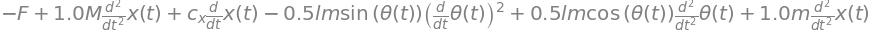

In [ ]:
# Damping forces
Q_x = F - cx * x_dot
Q_theta = -ctheta * theta_dot

# Equation for x
dL_dx = diff(L, x)
dL_dx_dot = diff(L, x_dot)
d_dt_dL_dx_dot = diff(dL_dx_dot, t)
EL_x = simplify(d_dt_dL_dx_dot - dL_dx - Q_x)
display(EL_x)

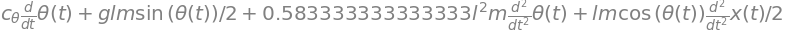

In [9]:
# Equation for theta
dL_dtheta = diff(L, theta)
dL_dtheta_dot = diff(L, theta_dot)
d_dt_dL_dtheta_dot = diff(dL_dtheta_dot, t)
EL_theta = simplify(d_dt_dL_dtheta_dot - dL_dtheta - Q_theta)
display(EL_theta)

## ✅ Final Result
These are the full nonlinear equations of motion for the damped cart-pendulum system with an external force on the cart.

## 🌟 Conclusion
This model now includes:
- Gravity
- Damping in both coordinates
- External actuation of the cart

Next step could be linearization or simulation!

In [13]:
from sympy import solve, lambdify

# Define second derivatives
x_ddot = diff(x, t, 2)
theta_ddot = diff(theta, t, 2)

# Solve Euler–Lagrange equations for the second derivatives
solutions = solve([EL_x, EL_theta], (x_ddot, theta_ddot), simplify=True)

# Extract expressions
x_ddot_expr = solutions[x_ddot]
theta_ddot_expr = solutions[theta_ddot]

# Prepare lambdified functions for numerical simulation
variables = (x, x_dot, theta, theta_dot, F, m, M, l, g, cx, ctheta)

x_ddot_func = lambdify(variables, x_ddot_expr, 'numpy')
theta_ddot_func = lambdify(variables, theta_ddot_expr, 'numpy')

import numpy as np
from scipy.integrate import solve_ivp

# Define the system of ODEs
def cartpole_derivs(t, y, F_input, params):
    x, x_dot, theta, theta_dot = y
    m, M, l, g, cx, ctheta = params

    dx2 = x_ddot_func(x, x_dot, theta, theta_dot, F_input, m, M, l, g, cx, ctheta)
    dtheta2 = theta_ddot_func(x, x_dot, theta, theta_dot, F_input, m, M, l, g, cx, ctheta)

    return [x_dot, dx2, theta_dot, dtheta2]




In [16]:
# Initial state: [x, x_dot, theta, theta_dot]
y0 = [0.0, 0.0, 0.1, 0.0]

# Parameter values
params = (0.1, 1.0, 1.0, 9.81, 0.1, 0.05)  # m, M, l, g, cx, ctheta
F_val = 0.0  # constant input force

# Time span and evaluation points
t_span = (0, 10)
t_eval = np.linspace(*t_span, 500)

# Run the simulation
sol = solve_ivp(cartpole_derivs, t_span, y0, t_eval=t_eval, args=(F_val, params))


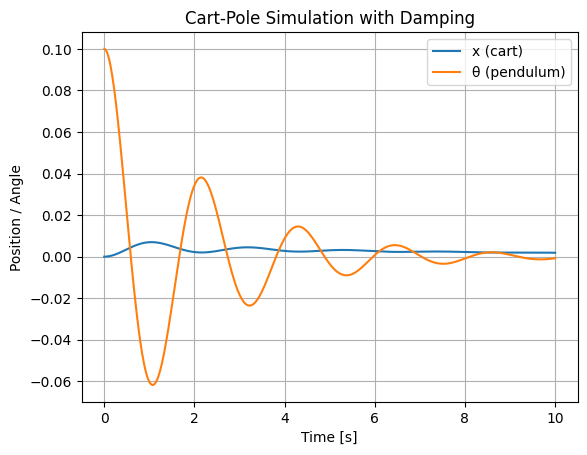

In [17]:
import matplotlib.pyplot as plt

plt.plot(sol.t, sol.y[0], label='x (cart)')
plt.plot(sol.t, sol.y[2], label='θ (pendulum)')
plt.xlabel('Time [s]')
plt.ylabel('Position / Angle')
plt.title('Cart-Pole Simulation with Damping')
plt.legend()
plt.grid(True)
plt.show()


## 🔹 6. Matrix Form of Equations of Motion

To better understand and simulate the system, we now rewrite the equations of motion in matrix form:

We define the generalized coordinates:

$$
q = \begin{bmatrix} x \\\\ \theta \end{bmatrix}, \quad
\dot{q} = \begin{bmatrix} \dot{x} \\\\ \dot{\theta} \end{bmatrix}, \quad
\ddot{q} = \begin{bmatrix} \ddot{x} \\\\ \ddot{\theta} \end{bmatrix}
$$

The equations take the standard form:

$$
M(q) \ddot{q} + C(q, \dot{q}) + G(q) + D(\dot{q}) = B u
$$

Where:

- \( M(q) \) is the mass/inertia matrix,
- \( C(q, \dot{q}) \) includes Coriolis/centrifugal terms,
- \( G(q) \) includes gravity forces,
- \( D(\dot{q}) \) represents damping/friction,
- \( B \) maps the external input force \( F \) to the system.

We will now derive each term symbolically using SymPy.


In [18]:
from sympy import Matrix, collect, expand, simplify

# Define second derivatives for vectorized form
x_ddot = diff(x, t, 2)
theta_ddot = diff(theta, t, 2)

# Collect terms in EoMs
EL_x_eq = simplify(EL_x.expand())
EL_theta_eq = simplify(EL_theta.expand())

# Build symbolic vector of accelerations
ddq = Matrix([x_ddot, theta_ddot])

# Define mass matrix M(q) by collecting on accelerations
M_mat = Matrix([
    [EL_x_eq.coeff(x_ddot), EL_x_eq.coeff(theta_ddot)],
    [EL_theta_eq.coeff(x_ddot), EL_theta_eq.coeff(theta_ddot)]
])

# Define right-hand sides (everything else except M * ddq)
rhs_x = simplify(EL_x_eq - M_mat[0, 0]*x_ddot - M_mat[0, 1]*theta_ddot)
rhs_theta = simplify(EL_theta_eq - M_mat[1, 0]*x_ddot - M_mat[1, 1]*theta_ddot)
rhs = Matrix([rhs_x, rhs_theta])

# Display matrix form
display(M_mat)
display(rhs)


⎡1.0⋅M + 1.0⋅m    0.5⋅l⋅m⋅cos(θ(t))   ⎤
⎢                                     ⎥
⎢l⋅m⋅cos(θ(t))                     2  ⎥
⎢─────────────  0.583333333333333⋅l ⋅m⎥
⎣      2                              ⎦

⎡                                                   2⎤
⎢            d                            ⎛d       ⎞ ⎥
⎢-F + 1.0⋅cₓ⋅──(x(t)) - 0.5⋅l⋅m⋅sin(θ(t))⋅⎜──(θ(t))⎟ ⎥
⎢            dt                           ⎝dt      ⎠ ⎥
⎢                                                    ⎥
⎢                d          g⋅l⋅m⋅sin(θ(t))          ⎥
⎢         cₜₕₑₜₐ⋅──(θ(t)) + ───────────────          ⎥
⎣                dt                2                 ⎦